<a href="https://colab.research.google.com/github/JorgeHdzRiv/Program-neural-networks-with-TensorFlow/blob/main/Handwritten_Digit_recognition_with_CNNs_Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de dígitos escritos a mano con CNN
------------------------------------------------------------------------------



**MNIST** *es una base de datos que tiene dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes. La base de datos también se usa ampliamente para capacitación y pruebas en el campo del aprendizaje automático.* ***Contiene 60 000 imágenes de entrenamiento y 10 000 imágenes de prueba.*** 

Usando las herramientas de Tensorflow, cargue esta base de datos y realice una red neuronal convolucional (CNN) que pueda predecir los **dígitos del 0 - 9**.

La estructura de la red, debe ser definida con la capa de entrada con 784 neuronas, especificando que llegará de forma cuadrada en una imagen de 28x28 pixeles.

Declare dos capas ocultas de 64 neuronas cada una, utilice la función de activación **sigmoid** para la salida de los resultados. Así mismo, declare la capa de salida con 10 neuronas, utilizando la función de activación **softmax** para la clasificación de resultados y arroje el pronośtico mas acertado, según el número leído.

$Función$ $Sigmoide:$

$ 
σ(x) = \frac{1}{1+e^x}  
$

$Función$ $Softmax:$

$ 
s(x_i) = \frac{e^{x_i}}{∑_{j=1}^ne^{x_j}}  
$

Para los algoritmos de optimización y perdidas, utilice **Adam** y **Parse Categorical Crossentropy**, hay que precisar las métricas de prueba.

Realice un test de entrenamiento para verificar las epocas dadas y visualice el comportamiento de las perdidas según el algoritmo utilizado.

Visualice los resultados de las predicciones y grafique por cada número, la probabilidad de(los) número(s) que el algoritmo haya identificado. 

Guarde el modelo anterior en un archivo con el nombre y tipo de dato **mymodel.h5**


## Preparando los Datos

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [34]:
data, metadata = tfds.load('mnist', as_supervised = True, with_info = True)

In [35]:
print('METADATOS:\n')
metadata

METADATOS:



tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [36]:
print('DATASET:\n')
data

DATASET:



{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [37]:
train_dataset, test_dataset = data['train'], data['test']
train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [38]:
class_name = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']
class_name

['Cero',
 'Uno',
 'Dos',
 'Tres',
 'Cuatro',
 'Cinco',
 'Seis',
 'Siete',
 'Ocho',
 'Nueve']

In [39]:
num_train_example = metadata.splits['train'].num_examples
num_test_example = metadata.splits['test'].num_examples
num_train_example, num_test_example

(60000, 10000)

## Normalizando los datos

In [40]:
def normalize(images, labels):

  images = tf.cast(images, tf.float32)
  images /= 255

  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset, test_dataset

(<MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

## Haciendo el modelo

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(64, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(64, activation = tf.nn.sigmoid),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)                         
    ])

## Compilando el modelo

In [42]:
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [43]:
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_example).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [48]:
historial = model.fit(
    train_dataset, epochs = 10,
    steps_per_epoch = math.ceil(num_train_example/BATCHSIZE)
)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0359 - accuracy: 0.9898
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9905
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0242 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0201 - accuracy: 0.9943
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0163 - accuracy: 0.9956
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0141 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0121 - accuracy: 0.9971
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [50]:
test_loss, test_accuracy = model.evaluate(
    test_dataset, steps = math.ceil(num_test_example/BATCHSIZE)
)

print("Resultado de pruebas:", test_accuracy)
print("Resultado de perdidas:", test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.1027 - accuracy: 0.9724
Resultado de pruebas: 0.9724000096321106
Resultado de perdidas: 0.10265100002288818


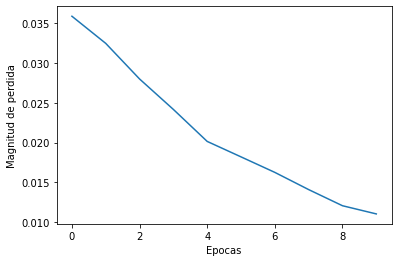

In [51]:
def loss_function_visualization(historial = historial):
  plt.xlabel("Epocas")
  plt.ylabel("Magnitud de perdida")
  plt.plot(historial.history["loss"])

loss_function_visualization()

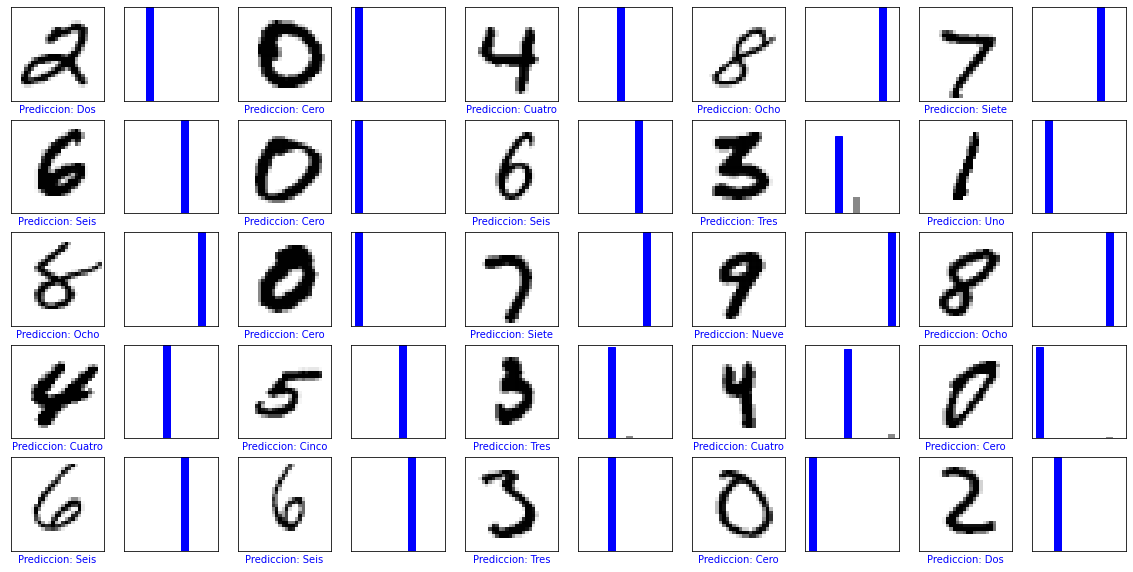

In [52]:
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)
 
def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_name[predicted_label]), color=color)
 
def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')
 
numrows=5
numcols=5
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()